<a href="https://colab.research.google.com/github/kurokiasahi222/Uplimit-Intermediate-SQL/blob/main/Week_2_Project_Intermediate_SQL_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 1. DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.
> 2. SHARE SETTINGS: In the new notebook, click "Share" in the top right corner and set the sharing settings to "Anyone with the link" ("Commenter" role).




Welcome to the Week 2 Project! This week's material dove further into advanced queries on a single SQL table.


# **Prerequisite Configuration - RUN THESE CELLS BEFORE STARTING**

Below we install the software required to run this project. Please make sure to **RUN IT** by clicking on the play-button icon and to feel free to ignore the content of these two hidden cells.

**IMPORTANT:** These cells may have to be rerun every time you are away from the notebook a long time or access notebook on a different browser or a different laptop. If you see an error that says
"NameError: name 'run' is not defined" you need to run these two hidden cells again.

In [ ]:
%%capture
!pip install git+https://github.com/uplimit/course-intermediate-sql.git

In [ ]:
import pandas as pd
from IPython.display import display, HTML
from sql_course import run as sql_run
from sql_course import check

# Show all the rows (instead of only a few)
pd.set_option("display.max_rows", None)

# Set precision to max 2 decimals
pd.set_option('display.precision', 2)

# Set CSS Style for Table
# Make it work with night & light mode
# - Alternating rows
# - th elements
# - td elements
css_style = '''
<style>
  html {
    --td-font-color: black;
    --font-color: black;
    --background-color: #e0e0e0;
  }
  html[theme=dark] {
    --td-font-color: white;
    --font-color: black;
    --background-color: #6688ff;
  }
  th {
    background: #fbd44c;
    color: var(--font-color);
    font-size: 16px;
    text-align: center;
    font-weight: bold;
  }
  tr:nth-child(even) {
    background-color: var(--background-color);
    color: var(--font-color);
  }
  td {
    font-size: 14px;
    color: var(--td-font-color);
  }
</style>
'''


def run(sql_query):
  df = sql_run(sql_query)

  # Puts the scrollbar next to the DataFrame
  display(HTML(css_style +
               "<div style='max-height: 500px; overflow: auto; width: fit-content; border-style: solid;" +
               " border-width: 1px; border-color: #0139fe; font-family: GT Planar,Inter,Arial,sans-serif;'>" +
               df.style.to_html() +
               "</div>"))


# **The Setting:**

Your career at Uplimit has continued to grow! After performing some basic analysis in your first week on the job, you've now been entrusted to do further deep dives into Uplimit's data to gain more insights around the impacts of COVID, and areas where the business is underperforming. You'll put your new SQL skills to good use as you look further into this data!





# **Schema:**
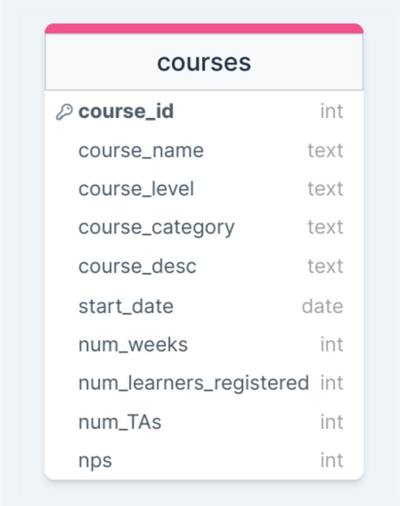





# **Create Table Statement:**

The table you will be working on was created with the following create statement (you do not have to create this table and it is already pre-loaded):



```
CREATE TABLE courses (
  course_id INTEGER,
  course_name TEXT,
  course_desc TEXT,
  course_category TEXT,
  course_level TEXT,
  start_date DATE,
  num_weeks INTEGER,
  num_learners_registered INTEGER,
  num_TAs INTEGER,
  nps INTEGER
);
```



# **Disclaimer**

Any resemblance of the data in this table to anything real (other than the names and descriptions of courses) are entirely random (could have been my pseudo random generator or my own imagination, since it isn't easy to distinguish between the two :-), so do not stress yourself out trying to make sense of any categorization, such as why a course run might even overlap with another run and such other niceties).

# **Part 1 - Courses with the highest NPS ratings:**

In [ ]:
### Question: q0_1_2
### Print all columns (using "select *") for the top 10 courses with the highest nps ratings, ordered from highest to lowest nps
### Hint: You will have to use ORDER BY as well as LIMIT
### Output columns: (use select *)
query = """


        """

run(query)
check(q0_1_2 = query)

# **Part 2 - Digging into Machine Learning courses:**

They have heard from their boss that Machine Learning is a very important category for the Uplimit business, and it would be very good to keep expanding the scope of the courses in this broad area. But before that we should understand reality today. So, their logical next question:




You want to look at how many courses we have run for each year to get an idea of that distribution.

In [ ]:
### Question: q1_1_1
### For the course category 'Machine Learning,'
### how many courses have we run so far for each calendar year?
### Hint: for each calendar year suggests you need to use GROUP BY.
### Output columns: year, count_by_year

query = """


        """

run(query)
check(q1_1_1 = query)

Hmm...  Anecdotally you seem to recollect that we are running 60+ courses a year that can be termed 'Machine Learning.' The general talk around the water cooler is that we seem to have 5 Machine Learning courses a month. We would need to be running quite a few more courses to get to 60 per year. One thing that comes to your notice is that there are perhaps courses that are not filed under the 'Machine Learning' category but could still be considered 'Machine Learning.' You decide to look for some words in the name and description to potentially infer other courses that you could consider 'Machine Learning.'

In [ ]:
### Question: q1_1_2
### Retrieve distinct combinations of name, category and descriptions of courses
### that contain one of the words  'ml' or 'learning' or 'models'
### We want the match to be case-insensitive.
### Note that in general this need not be the same set of courses
### as ones that belong to the category 'Machine Learning.'
### Hint: The below link has string manipulation functions you may need such
### as Like, Upper, Lower etc.
### Output columns: course_name, course_category, course_desc

query = """


        """

run(query)
check(q1_1_2 = query)

You found a few more courses that are in the 'Deep Learning' category and in the 'Language Processing' category that could be considered 'Machine Learning,' but you also found other courses that refer to data models under the 'Data Engineering' category. You decide to cross-check what would happen if you were to also count the courses run per year in the categories 'Deep Learning' and 'Language Processing.'

In [ ]:
### Question: q1_1_3
### For the course category 'Machine Learning,' 'Deep Learning' and 'Language Processing,'
### how many courses have we run so far for each calendar year?
### Output Columns: year, count_by_year

query = """

        """

run(query)
check(q1_1_3 = query)

That seems to align better with the anecdotal water cooler conversations. The head of content is happy that you have been able to paint a good picture of current reality and is now off trying to figure out what new courses to add and what instructors they need to engage. But your life as an analyst continues. The CEO has put together a special ops commando team called the 'COVID' impact team. Of course, you are part of this team as the ace analyst at Uplimit. Off we go!

# **Part 3 - COVID Impact:**

As mentioned before, the CEO has put together a special ops commando team called the 'COVID' impact team which includes you as the star analyst. No one is sure if the courses were impacted by COVID as it has been a while. (You are in 2024 and the world has almost forgotten COVID (positive dreams are good for us 😀)). You suggest that you will mine the data and see if there are any quantitative differences between 2020 and other years.  

As you know by now, we are guided by nps quite a bit, as it is a great measure of how the course was perceived by the participants. So the first thing is to see if there is any substantial difference either in the total quantity of the courses or the average nps of the courses.


In [ ]:
### Question: q1_2_1
### Print the number of courses run per year
### Output columns: year, count_by_year
query = """


        """

run(query)
check(q1_2_1 = query)

That's interesting. The number of courses conducted doesn't seem to have been much lower in 2020. If anything, it is on the higher side. So somehow COVID did not impact the number of courses. Let's look at the average nps next and contrast 2020 with the other years.

In [ ]:
### Question: q1_2_2
### Print a report with two columns titled covid_nps and rest_nps.
### covid_nps will have the average of the nps of courses that started in 2020 and
### rest_nps will have the average of the nps of courses that started in other years
### You need to use the CASE WHEN statement in this module.
### to identify rows that belong to 2020 and average the nps of those rows to get covid_nps
### similarly for rest_nps. Recall that you can wrap a case statement with aggregate
### functions such as sum, count, avg from the last subsection of the above module
### Output columns: covid_nps, rest_nps

query = """


        """

run(query)
check(q1_2_2 = query)

Wow! Thats's a clear drop in the average nps in 2020 compared to the average nps of other years. The statistician in you wonders if there are other years where the nps is low and is compensated for some other years where nps is high - thus 2020 may not be an exception. Let's quickly cross-validate that thought!

In [ ]:
### Question: q1_2_3
### For each year, print the year and the average nps of the courses that started that year.
### Output columns: year, avg(nps)

query = """



        """

run(query)
check(q1_2_3 = query)

Ok, good! 2020 was an aberration. The logical next question is why? Are there any explanatory variables? You go talk to some folks who have been around in the company for a long time. They tell you they recollect that it was tough getting enough TAs for many courses in 2020. Additionally, the courses ran for longer to account for sickness of many of the staff as well as learners. You set out to validate this next.

In [ ]:
### Question: q1_2_4
### For each year, print the year, the average learner:TA ratio
### and the average number of weeks for the courses that started that year.
### Hint: You can create derived columns by dividing one column with another
### and further aggregate derived columns
### Output columns: year, learner_ta_ratio, avg_num_weeks


query = """


        """

run(query)
check(q1_2_4 = query)

Awesome! You have a reasonable explanation for the huge nps drop. While another catastrophic event like COVID is unlikely to happen (and no one wants one more), there can be minor challenges that come up more regularly. This reminds you that you need to watch out for the number of weeks or num_tas starting to change dramatically over time (proactively monitoring for problems!). This is not something you will do in this course however.

# **Part 4 - Looking for pockets of underperformance:**

The head of content creation would like to understand the distribution of nps overall to get their bearings (recall that this is the most important metric for the business).





You have looked at the overall average nps and that looks fine. You decide to dig deeper and see if you can find pockets of underperformance. You instintctively decide to explore if the size of a course (number of learners) has some correlation with the nps.

In [ ]:
### Question: q1_3_1
### Let's group the number of learners into three buckets:
### low (fewer than 30 learners), medium (30-99) and high (>=100 learners)
### Please filter rows that have NULLs in num_learners_registered column in your query.
### Also recall group by can take a case statement as the column to group by
### Let's get the minimum, maximum, and the average of the nps for each of these three buckets.
### Output columns: num_learners_bucket, min_nps, max_nps, avg_nps
query = """


        """

run(query)
check(q1_3_1 = query)

Aha! You observe something very interesting right away: all courses with fewer than 30 learners have extremely high nps compared to the other buckets. That's great, but the premise of Uplimit is to scale the quality of experience and learning for as many learners as possible. So we would like to see the medium and high buckets also improve. The head of content decides to explore what aspects of the platform can be improved even when we have a large scale offline.

While the head of content is exploring how to improve high registration courses offline, you have been joining the head of course content in some feedback interviews with learners. The positive interviews always seems to have two flavors: a few learners preferred courses that ran longer and dug deeper into an area, while others preferred courses that were quick and exposed them to a new area. You decide to investigate this and see if somehow the nps was correlated to this combination of the length of the course and the level of the course.

In [ ]:
### Question:q1_3_2
### Let's designate courses that are less than 4 weeks to be 'short'
### and all the others 'long' and call this course_duration.
### Let's get the average nps for each course_level and course_duration combination.
### Note there should be four rows in your output given that
### we have two values for course_duration and two values for course_level.
### Output columns: course_duration, course_level, avg_nps
query = """


        """

run(query)
check(q1_3_2 = query)

Aha! Indeed the advanced courses seem to make more sense when they are run longer. Perhaps the learners feel they are able to dig into the subject. Conversely, shorter basic courses are more valuable - just a quickstart or a crash course to get introduced to a new area so they can come back to advanced courses after digesting the basic course quickly. A great analysis by you and something that has made a huge dent in understanding the course data!

# **Conclusion:** That was some fantastic work! Your SQL skills are really getting polished, and you're now ready for the tests ahead of you involving multiple tables.